In [12]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import random
%matplotlib inline
import numpy as np
#loading
(train_X, train_y), (test_X, test_y) = mnist.load_data()

#shape of dataset
print('train_X: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))




train_X: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [36]:
def show(image, title):
    index = 1
    plt.figure(figsize=(10,5))

    for x in zip(image, title):
        image = x[0]
        title = x[1]
        plt.subplot(2, 5, index)
        plt.imshow(image, cmap=plt.cm.gray)
        plt.title(x[1], fontsize = 9)
        index += 1



In [46]:
def create_single_collage(idx_list):
    row1 = np.concatenate((train_X[idx_list[0]], train_X[idx_list[1]]), axis=1)
    row2 = np.concatenate((train_X[idx_list[2]], train_X[idx_list[3]]), axis=1)
    collaged_X = np.concatenate((row1, row2), axis=0)
    collaged_y = np.array([train_y[idx_list[0]],train_y[idx_list[1]],train_y[idx_list[2]],train_y[idx_list[3]]])
    return collaged_X, collaged_y

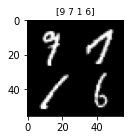

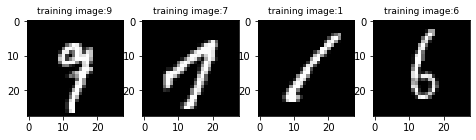

In [47]:
image = []
title = []
idx = []
for i in range(4):
    r = random.randint(1, len(train_X))
    image.append(train_X[r])
    idx.append(r)
    title.append('training image:' + str(train_y[r]))
(X,y) = create_single_collage(idx)
collaged_X = [X]
collaged_y = [y]
show(collaged_X, collaged_y)

show(image, title)

In [56]:
def generate_random_idx_list(l):
    idx_list = random.sample(range(len(train_X)), k=l)
    return np.array(idx_list)

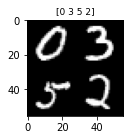

In [57]:
idx_list = generate_random_idx_list(4)
(X,y) = create_single_collage(idx_list)
collaged_X = [X]
collaged_y = [y]
show(collaged_X, collaged_y)

(6000, 56, 56) (6000, 4)


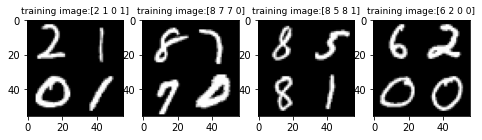

In [63]:
dataset_len =6000
collaged_X = []
collaged_y = []
for i in range(dataset_len):
    idx_list = generate_random_idx_list(4)
    (X,y) = create_single_collage(idx_list)
    collaged_X.append(X)
    collaged_y.append(y)
print(np.array(collaged_X).shape, np.array(collaged_y).shape)
image = []
title = []
for i in range(4):
    r = random.randint(1, len(collaged_X))
    image.append(collaged_X[r])
    title.append('training image:' + str(collaged_y[r]))

show(image, title)